In [17]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [1]:
data = pd.read_csv('../../Data/full_data.csv',low_memory=False)

ann2_variables = [
    'strike',
    'stock',
    'tau',
    'sigma',
    'price',
    'call',
    'dividendRate',
    'dividendYield',
    'fiveYearAvgDividendYield',
]

ann2_data = data[ann2_variables]

In [ ]:
ann2_call_data = ann2_data[ann2_data.call == 1]
ann2_put_data = ann2_data[ann2_data.call == 0]

ann2_call_data.drop('call', axis = 1, inplace = True)
ann2_put_data.drop('call', axis = 1, inplace = True)

### TRAINING PHASE


In [ ]:
X = ann2_call_data[[
        'strike',
        'stock', 
        'tau',
        'sigma',
        'dividendRate',
        'dividendYield',
        'fiveYearAvgDividendYield',
          ]]
y = ann2_call_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [7]:
ANN2_call = Sequential()
ANN2_call.add(Dense(30,input_dim = 7, activation = 'relu'))
ANN2_call.add(Dense(30, activation = 'relu'))
ANN2_call.add(Dense(30, activation = 'relu'))
ANN2_call.add(Dense(30, activation = 'relu'))
ANN2_call.add(Dense(1))

ANN2_call.compile(loss = 'mean_squared_error',optimizer = 'Adam')
ANN2_call.fit(X_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100


c:\Users\Domenico\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


973/973 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3292.3833
Epoch 2/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - loss: 756.2087
Epoch 3/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - loss: 756.4308
Epoch 4/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 808.5652
Epoch 5/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 596.9481
Epoch 6/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 661.4568
Epoch 7/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 653.2264
Epoch 8/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 599.7253
Epoch 9/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - loss: 662.8998
Epoch 10/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - loss: 704.9264
Epoch 11/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - loss: 613.9502
Epoch 12/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - loss: 698.2358
Epoch 13/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - loss: 632.3557
Epoch 14/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - loss: 703.1551
Epoch 15/1

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


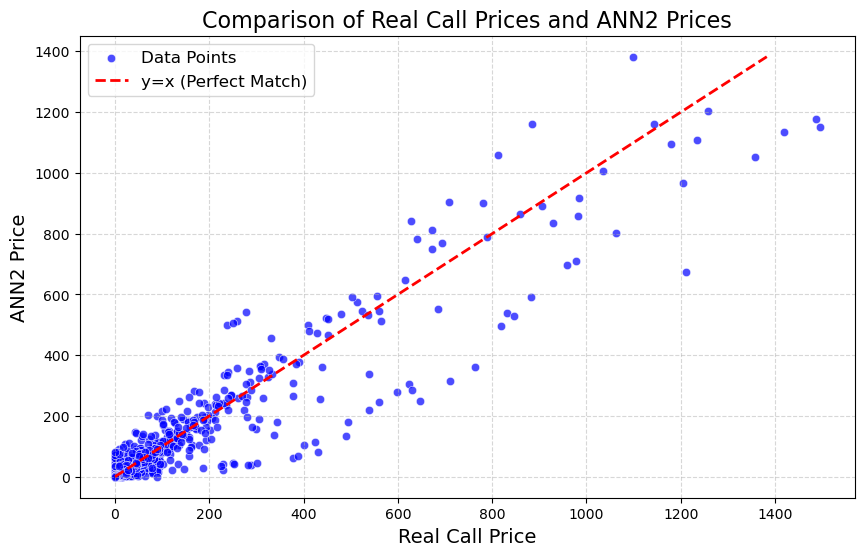

In [ ]:
X = ann2_call_data[['strike', 'stock', 'tau', 'sigma', 'dividendRate','dividendYield','fiveYearAvgDividendYield',]]
y = ann2_call_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

y_pred = ANN2_call.predict(X_test)

y_test = y_test.values.flatten()  
y_pred = y_pred.flatten() 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7, label='Data Points')
plt.plot([y_test.min(), y_pred.max()], [y_test.min(), y_pred.max()],color='red', linestyle='--', linewidth=2, label='y=x (Perfect Match)')

plt.title('Comparison of Real Call Prices and ANN2 Prices', fontsize=16)
plt.xlabel('Real Call Price', fontsize=14)
plt.ylabel('ANN2 Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.savefig('scatter_comparison_call_ann2.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
X = ann2_put_data[[
        'strike',
        'stock', 
        'tau',
        'sigma',
        'dividendRate',
        'dividendYield',
        'fiveYearAvgDividendYield',
          ]]
y = ann2_put_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [63]:
ANN2_put = Sequential()
ANN2_put.add(Dense(30, input_dim=7, activation='relu'))
ANN2_put.add(Dense(30, activation='relu'))
ANN2_put.add(Dense(30, activation='relu'))
ANN2_put.add(Dense(30, activation='relu'))
ANN2_put.add(Dense(30, activation='relu'))
ANN2_put.add(Dense(30, activation='relu'))
ANN2_put.add(Dense(1))

ANN2_put.compile(loss = 'mean_squared_error',optimizer = 'Adam')
ANN2_put.fit(X_train,y_train,epochs = 200, batch_size = 32)

Epoch 1/200


c:\Users\Domenico\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1066/1066 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 683.7403
Epoch 2/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 399.1574
Epoch 3/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 293.1608
Epoch 4/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 294.8632
Epoch 5/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 354.0986
Epoch 6/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 232.7270
Epoch 7/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 296.9320
Epoch 8/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 282.2986
Epoch 9/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 239.1883
Epoch 10/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 226.6117
Epoch 11/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 262.6935
Epoch 12/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 262.4816
Epoch 13/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 292.1429
Epoch 14/200
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 309.3861

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


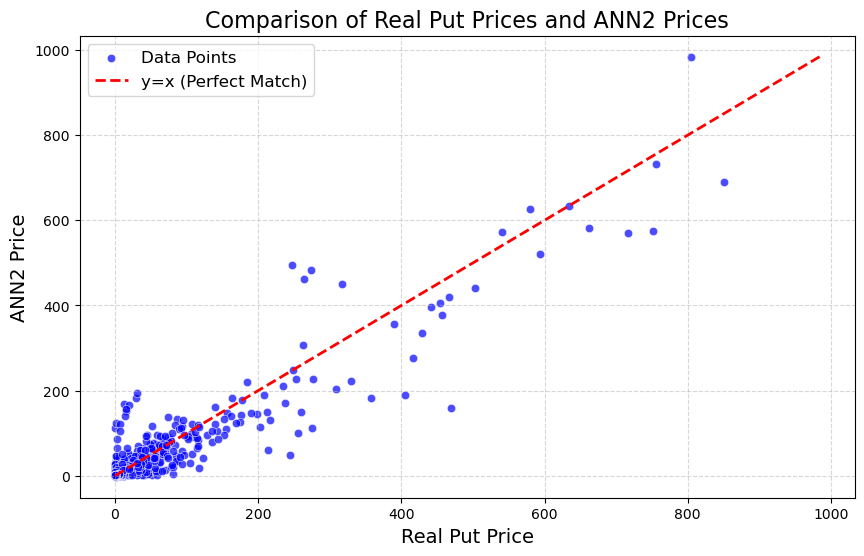

In [66]:
X = ann2_put_data[['strike', 'stock', 'tau', 'sigma', 'dividendRate','dividendYield','fiveYearAvgDividendYield',]]
y = ann2_put_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

y_pred = ANN2_put.predict(X_test)

y_test = y_test.values.flatten()  
y_pred = y_pred.flatten() 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7, label='Data Points')
plt.plot([y_test.min(), y_pred.max()], [y_test.min(), y_pred.max()],color='red', linestyle='--', linewidth=2, label='y=x (Perfect Match)')

plt.title('Comparison of Real Put Prices and ANN2 Prices', fontsize=16)
plt.xlabel('Real Put Price', fontsize=14)
plt.ylabel('ANN2 Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.savefig('scatter_comparison_put_ann2.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
ANN2_call.save('models\\ann2\ANN2_call.keras')
ANN2_put.save('models\\ann2\ANN2_put.keras')

#### PERFORMANCE FOR CALL MODEL

In [ ]:
ANN2_call = load_model('models\\ann2\\ANN2_call.keras')

In [22]:
X = ann2_call_data[[
        'strike',
        'stock', 
        'tau',
        'sigma',
        'dividendRate',
        'dividendYield',
        'fiveYearAvgDividendYield',
          ]]
y = ann2_call_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [23]:
X_test['ann2'] = ANN2_call.predict(X_test)
X_test['price'] = y_test

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step


In [24]:
# Calculate Mean Squared Error (MSE)
ANN2_call_mse = mean_squared_error(X_test['price'], X_test['ann2'])

# Calculate Root Mean Squared Error (RMSE)
ANN2_call_rmse = np.sqrt(ANN2_call_mse)

# Calculate Mean Absolute Error (MAE)
ANN2_call_mae = mean_absolute_error(X_test['price'], X_test['ann2'])

# Calculate Mean Absolute Percentage Error (MAPE)
ANN2_call_mape = np.mean(np.abs((X_test['price'] - X_test['ann2']) / X_test['price'])) * 100

# Calculate R-squared
ANN2_call_r_squared = r2_score(X_test['price'], X_test['ann2'])

print("Mean Squared Error (MSE):", ANN2_call_mse)
print("Root Mean Squared Error (RMSE):", ANN2_call_rmse)
print("Mean Absolute Error (MAE):", ANN2_call_mae)
print("Mean Absolute Percentage Error (MAPE):", ANN2_call_mape)
print("R-squared:", ANN2_call_r_squared)

Mean Squared Error (MSE): 674.8892729566869
Root Mean Squared Error (RMSE): 25.978631083193875
Mean Absolute Error (MAE): 5.633281263726461
Mean Absolute Percentage Error (MAPE): 1236.9328597904846
R-squared: 0.8966995651115302


#### PERFORMANCE FOR PUT MODEL

In [113]:
ANN2_put = load_model('models\\ann2\\ANN2_PUT.keras')

In [67]:
X = ann2_put_data[[
        'strike',
        'stock', 
        'tau',
        'sigma',
        'dividendRate',
        'dividendYield',
        'fiveYearAvgDividendYield',
          ]]
y = ann2_put_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [68]:
X_test['ann2'] = ANN2_put.predict(X_test)
X_test['price'] = y_test

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step


In [69]:
# Calculate Mean Squared Error (MSE)
ANN2_put_mse = mean_squared_error(X_test['price'], X_test['ann2'])

# Calculate Root Mean Squared Error (RMSE)
ANN2_put_rmse = np.sqrt(ANN2_put_mse)

# Calculate Mean Absolute Error (MAE)
ANN2_put_mae = mean_absolute_error(X_test['price'], X_test['ann2'])

# Calculate Mean Absolute Percentage Error (MAPE)
ANN2_put_mape = np.mean(np.abs((X_test['price'] - X_test['ann2']) / X_test['price'])) * 100

# Calculate R-squared
ANN2_put_r_squared = r2_score(X_test['price'], X_test['ann2'])

print("Mean Squared Error (MSE):", ANN2_put_mse)
print("Root Mean Squared Error (RMSE):", ANN2_put_rmse)
print("Mean Absolute Error (MAE):", ANN2_put_mae)
print("Mean Absolute Percentage Error (MAPE):", ANN2_put_mape)
print("R-squared:", ANN2_put_r_squared)

Mean Squared Error (MSE): 166.55936542684307
Root Mean Squared Error (RMSE): 12.90578805911685
Mean Absolute Error (MAE): 2.8753791959515698
Mean Absolute Percentage Error (MAPE): 745.6192602713302
R-squared: 0.878723638497197
